In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
Housing = pd.read_csv(r'C:\Users\tilum\OneDrive\Desktop\Housing.csv')

In [3]:
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data inspection

In [4]:
Housing.shape

(545, 13)

In [5]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
Housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# There might be some outliers in area col and bedroom col

In [8]:
Housing.describe(percentiles =[0.1,0.25,.5,.75,0.9,.99])

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
10%,2.835000e+06,3000.000000,2.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
90%,7.350000e+06,7980.000000,4.000000,2.000000,3.000000,2.000000
99%,1.054200e+07,12543.600000,5.000000,3.000000,4.000000,3.000000


In [9]:
Housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Outlier analysis

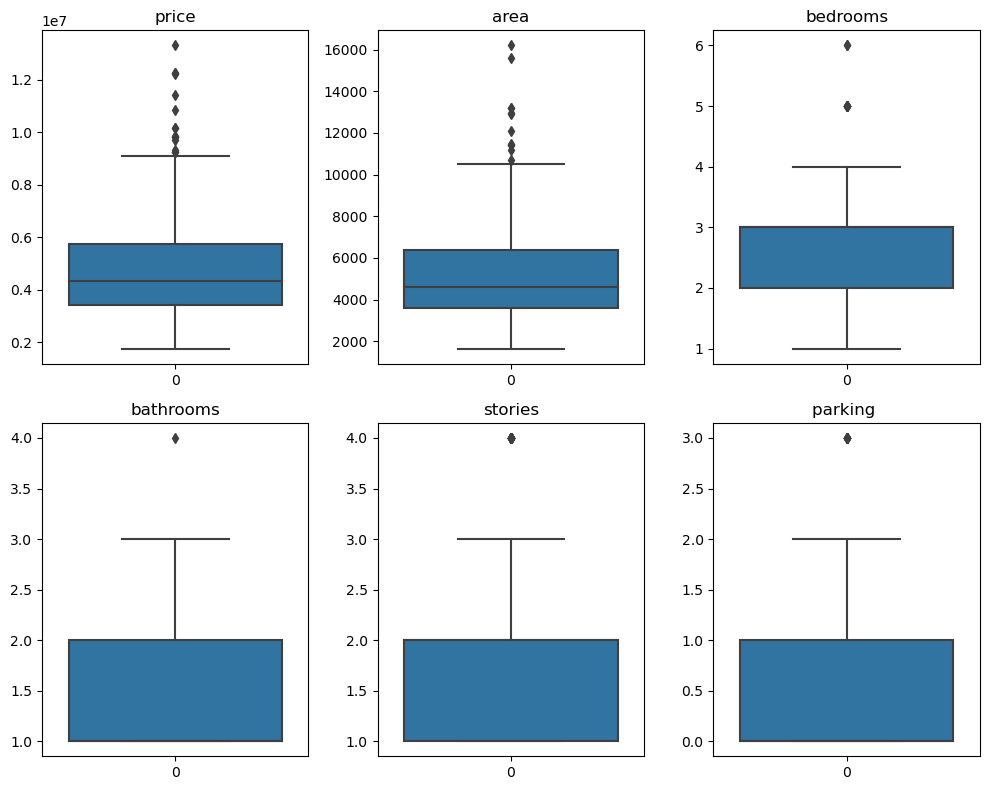

In [10]:
# Create a figure and 2 x 3 grid of subplots

fig, axs = plt.subplots(2,3, figsize = (10,8))

# Create box plots in the subplots

plt1 = sns.boxplot(Housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(Housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(Housing['bedrooms'], ax =axs [0,2])
plt1 = sns.boxplot(Housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(Housing['stories'], ax =axs [1,1])
plt3 = sns.boxplot(Housing['parking'], ax = axs[1,2])

# Set titles for the subplots

axs[0,0].set_title('price')
axs[0,1].set_title('area')
axs[0,2].set_title('bedrooms')
axs[1,0].set_title('bathrooms')
axs[1,1].set_title('stories')
axs[1,2].set_title('parking ')

# adjust layout to prevent overlap 

plt.tight_layout()

# show the figure

plt.show()

In [11]:
# Outlier treatment 
# Price and area have considerable amount of outliers

# outlier treatment of the price


Q1 = Housing['price'].quantile(.25)
Q3 = Housing['price'].quantile(.75)

print(Q1,Q3)

IQR = Q3-Q1

print(IQR)

3430000.0 5740000.0
2310000.0


In [12]:
lower_bound = Q1- 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print('lower_bound :',lower_bound, 'upper_bound:',upper_bound)

lower_bound : -35000.0 upper_bound: 9205000.0


In [13]:
# now identify the outliers-

outliers = Housing[(Housing['price']<lower_bound)|(Housing['price']>upper_bound)]

In [14]:
# outliers.info()

In [15]:
# df with no outliers

Housing = Housing[(Housing['price']>=lower_bound) & (Housing['price']<= upper_bound)]

In [16]:
Housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


{'whiskers': [<matplotlib.lines.Line2D at 0x19c3bc90490>,
 'caps': [<matplotlib.lines.Line2D at 0x19c3bc909d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19c3bc901f0>],
 'medians': [<matplotlib.lines.Line2D at 0x19c3bc90f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x19c3bc911b0>],
 'means': []}

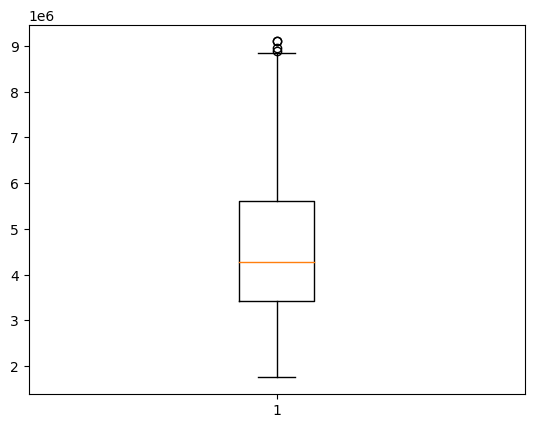

In [17]:
plt.boxplot(Housing['price'])

In [18]:
Housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [19]:
# finding the outliers for Area

# Q1 = Housing['area'].quantile(.25)
# Q3 = Housing['area'].quantile(.75)

# print(Q1,Q3)

# IQR = Q3-Q1

# print(IQR)

In [20]:
# lower_bound = Q1- 1.5*IQR
# upper_bound = Q3 + 1.5*IQR

# print('lower_bound :',lower_bound, 'upper_bound:',upper_bound)

In [21]:
# outliers = Housing[(Housing['area']<lower_bound)|(Housing['area']>upper_bound)]

In [22]:
# outliers

<Axes: xlabel='price'>

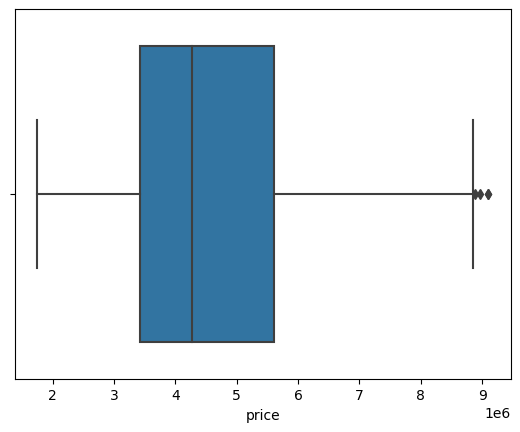

In [23]:
sns.boxplot(x= Housing['price'])

KeyError: 0

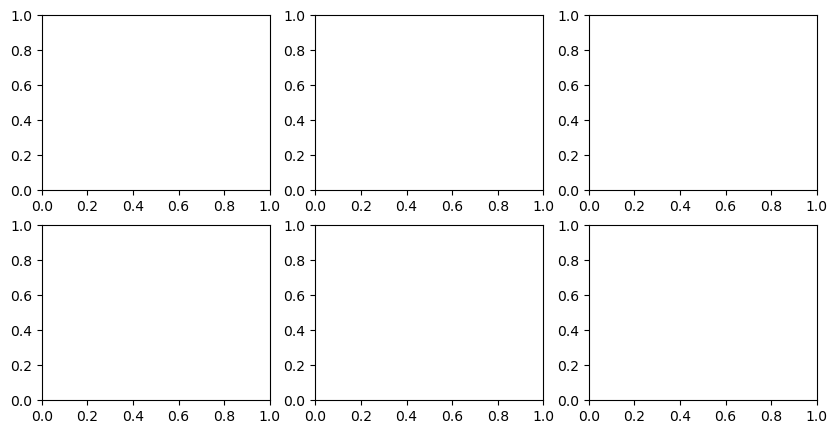

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,3, figsize = (10,5))


# Create box plots in the subplots

plt1 = sns.boxplot(Housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(Housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(Housing['bedrooms'], ax =axs [0,2])
plt1 = sns.boxplot(Housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(Housing['stories'], ax =axs [1,1])
plt3 = sns.boxplot(Housing['parking'], ax = axs[1,2])

# Set titles for the subplots

axs[0,0].set_title('price')
axs[0,1].set_title('area')
axs[0,2].set_title('bedrooms')
axs[1,0].set_title('bathrooms')
axs[1,1].set_title('stories')
axs[1,2].set_title('parking ')

# # adjust layout to prevent overlap 

plt.tight_layout()

# # show the figure

In [ ]:
Housing.max()

# EDA

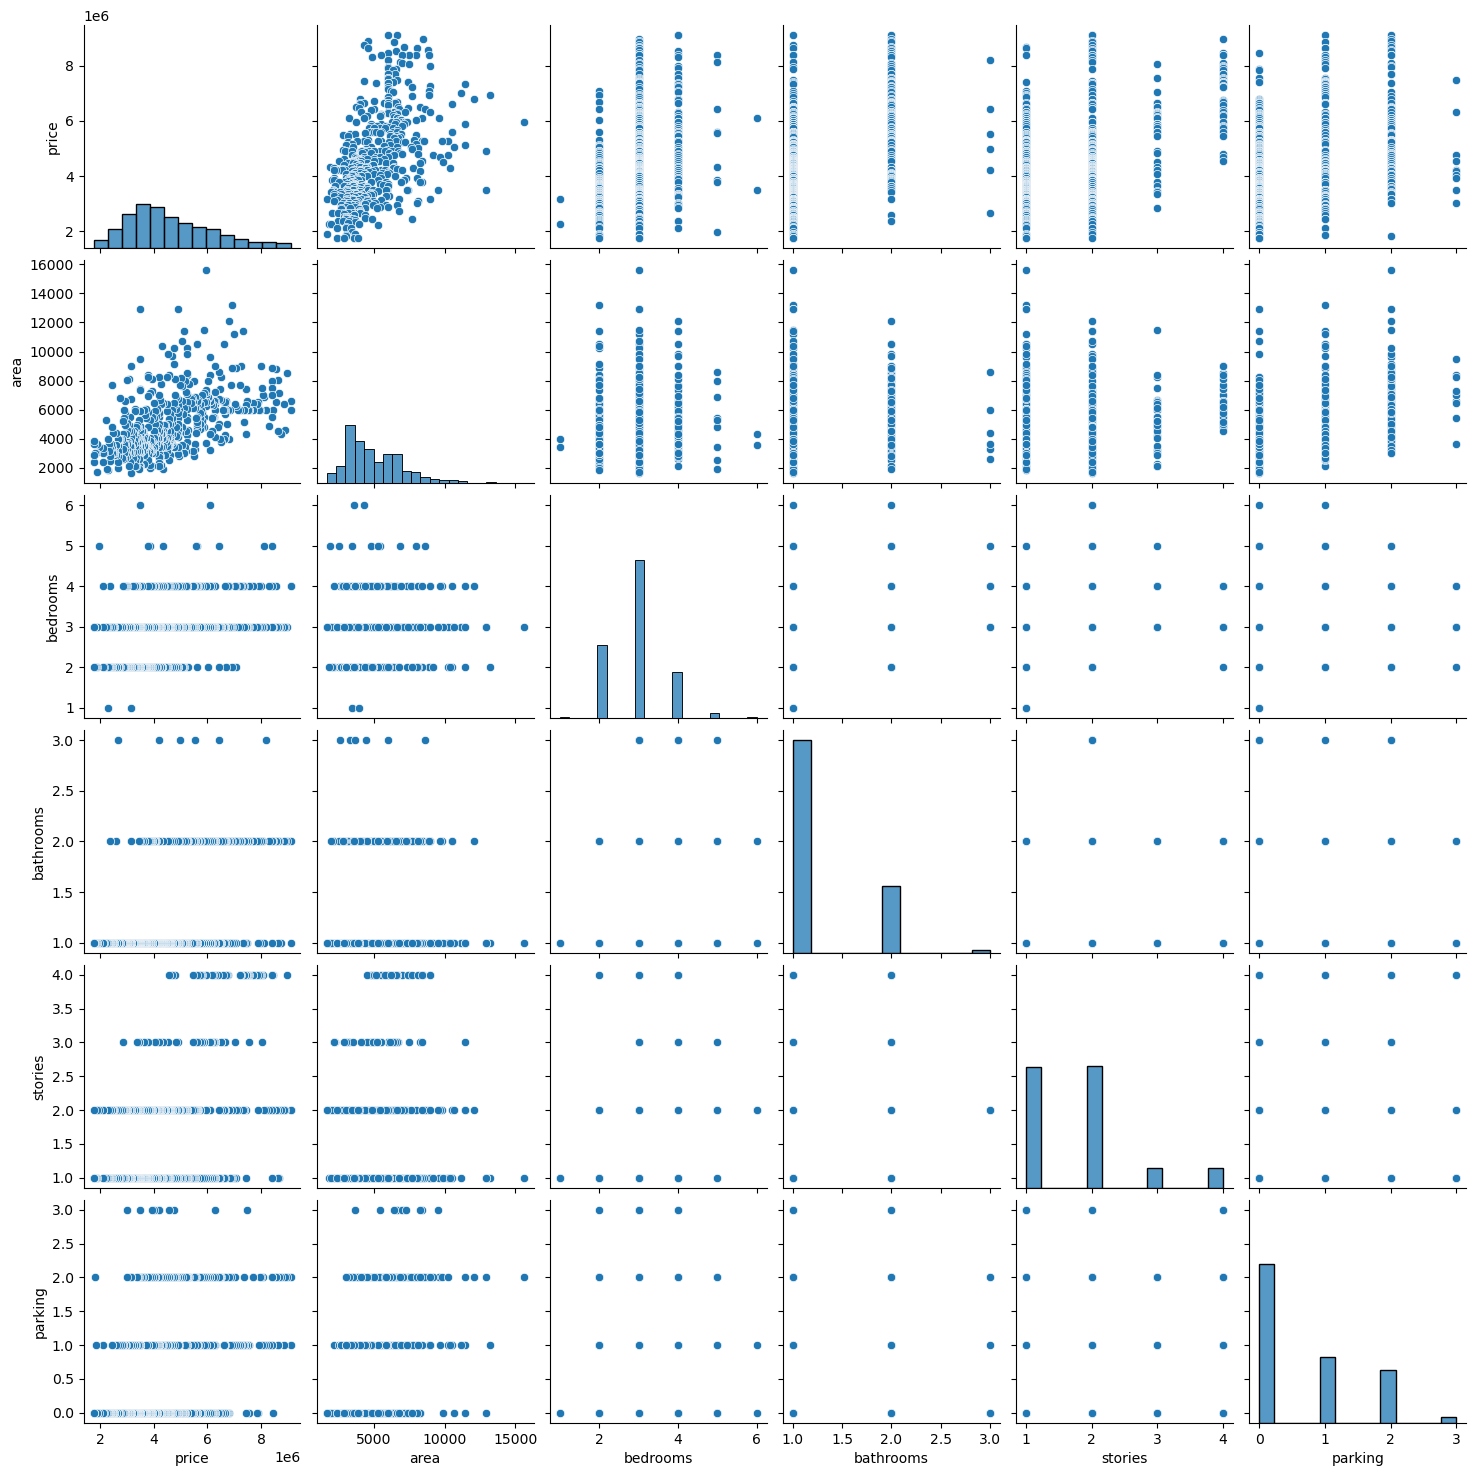

In [25]:
sns.pairplot(Housing)
plt.show()

In [26]:
# vizualizing categorical col

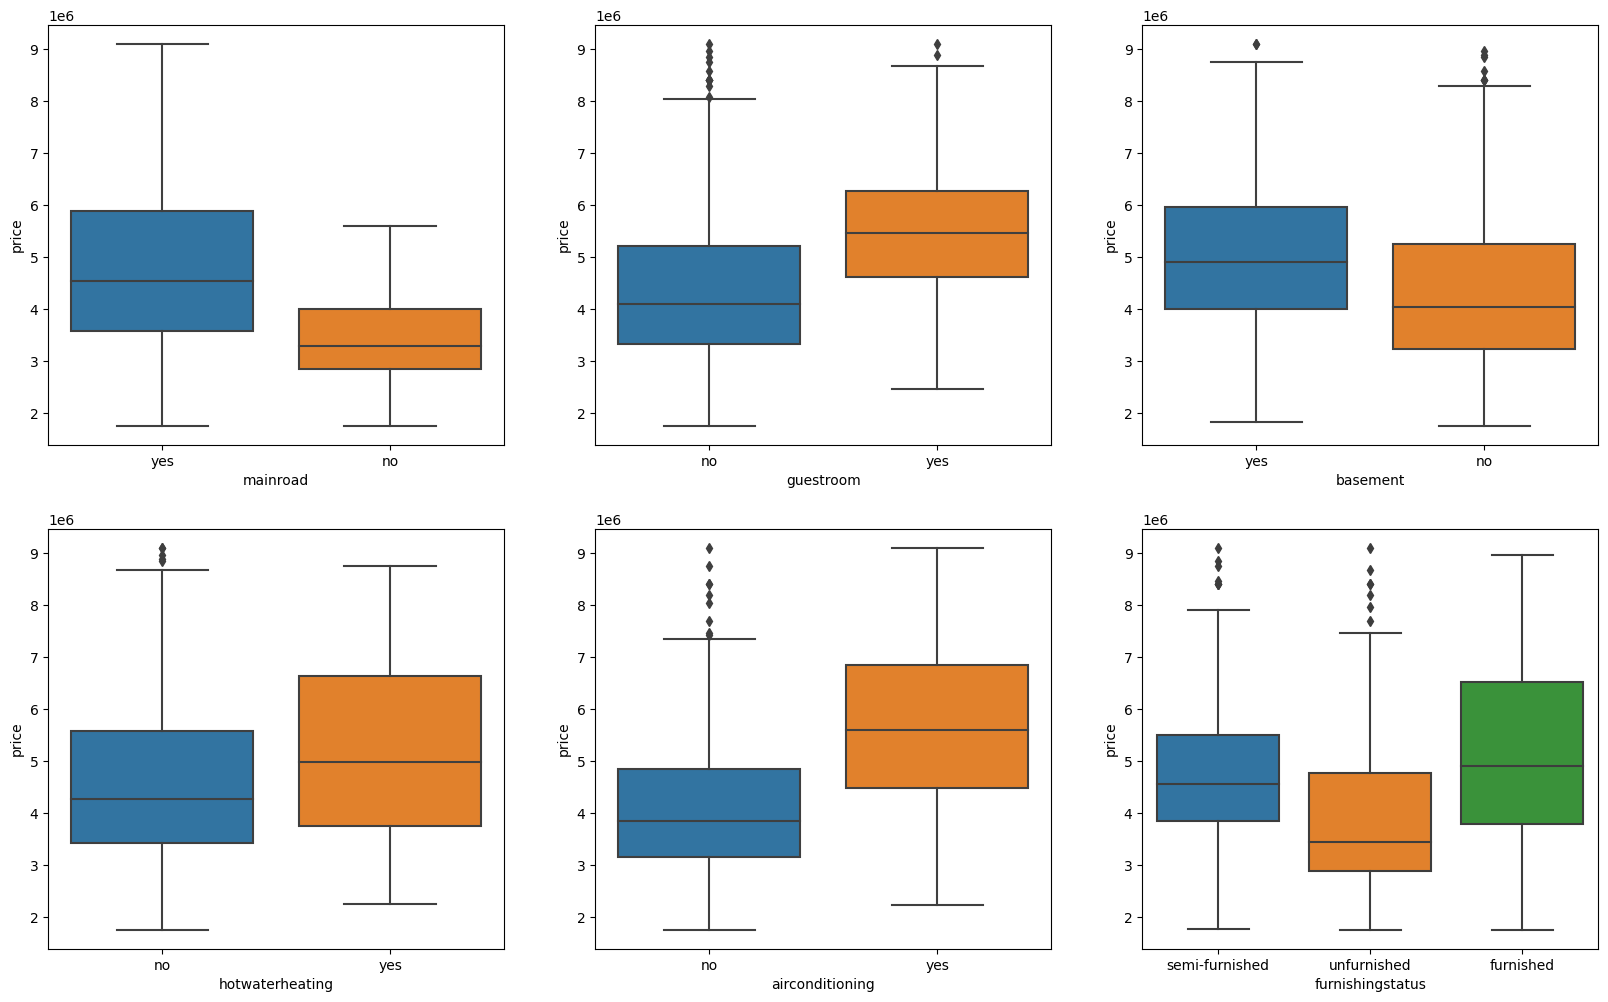

In [27]:
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data = Housing)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data = Housing)
plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data = Housing)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data = Housing)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data = Housing)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data = Housing)

plt.show()

In [28]:
# Now, let's find the relationship between furnishing status with airconditioning 

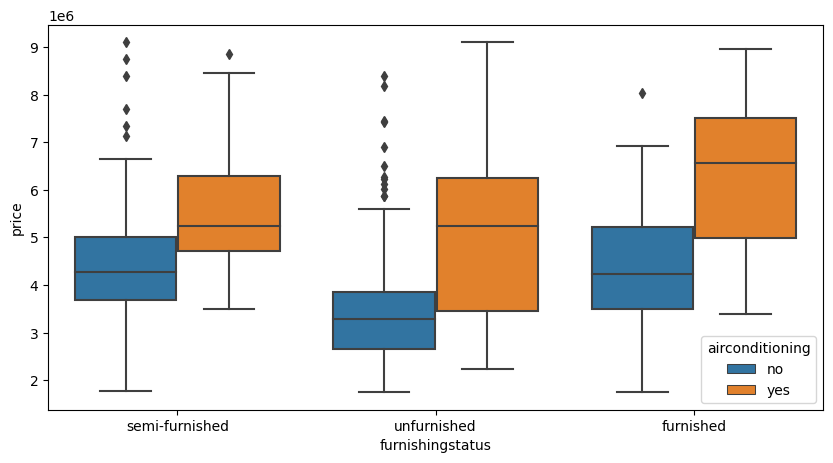

In [29]:
 plt.figure(figsize =(10,5))
sns.boxplot(x ='furnishingstatus',y='price',hue ='airconditioning', data = Housing)
plt.show()

# Data Preparation

In [30]:
# list the categorical cols

List_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

# defining the map function

def binary_map(x):
    return x.map({'yes':1,"no":0})

# applying the function to the df

Housing[List_cols]= Housing[List_cols].apply(binary_map)

In [31]:
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [32]:
# dummy variables/ indicator variables-- are used in stat modeling to represent categorical data numerically.  this is 
# used in reg analysis/ml/ and any other models that req numerical input. 

In [33]:
status = pd.get_dummies(Housing.furnishingstatus,drop_first = True,  dtype = int )

In [34]:
status

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [35]:
Housing = pd.concat([Housing, status], axis = 1)
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [36]:
Housing.drop(['furnishingstatus'], axis = 1, inplace = True)


In [37]:
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [38]:
# train test split

In [39]:
from sklearn.model_selection import train_test_split


In [40]:
Housing_train,Housing_test = train_test_split(Housing,train_size =0.7,test_size = 0.3, random_state =100)

In [41]:
Housing_train.shape

(371, 14)

In [42]:
Housing_test.shape

(159, 14)

In [43]:
# Rescaling features/normalizing/standardizing features---common preprocessing steps in ml and da

# Normalization: Scaling features to a range of [0, 1].
# Standardization: Scaling features to have a mean of 0 and a standard deviation of 1.

In [44]:
# We'll use the Min-Max Scaler from scikit-learn to normalize the features.


from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

In [45]:
num_vars = [ 'area','bedrooms','bathrooms','stories','parking','price']
Housing_train[num_vars]= scaler.fit_transform(Housing_train[num_vars])

In [46]:
Housing_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
48,0.776190,0.189964,0.4,0.5,0.333333,1,0,1,0,0,0.333333,0,0,1
465,0.176190,0.154122,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
144,0.523810,0.218638,0.6,0.0,0.333333,1,1,1,0,1,0.333333,0,0,0
395,0.238095,0.139785,1.0,0.0,0.333333,1,0,0,0,0,0.333333,0,0,1
254,0.371429,0.205018,0.6,0.0,0.333333,1,0,0,0,1,0.666667,0,1,0


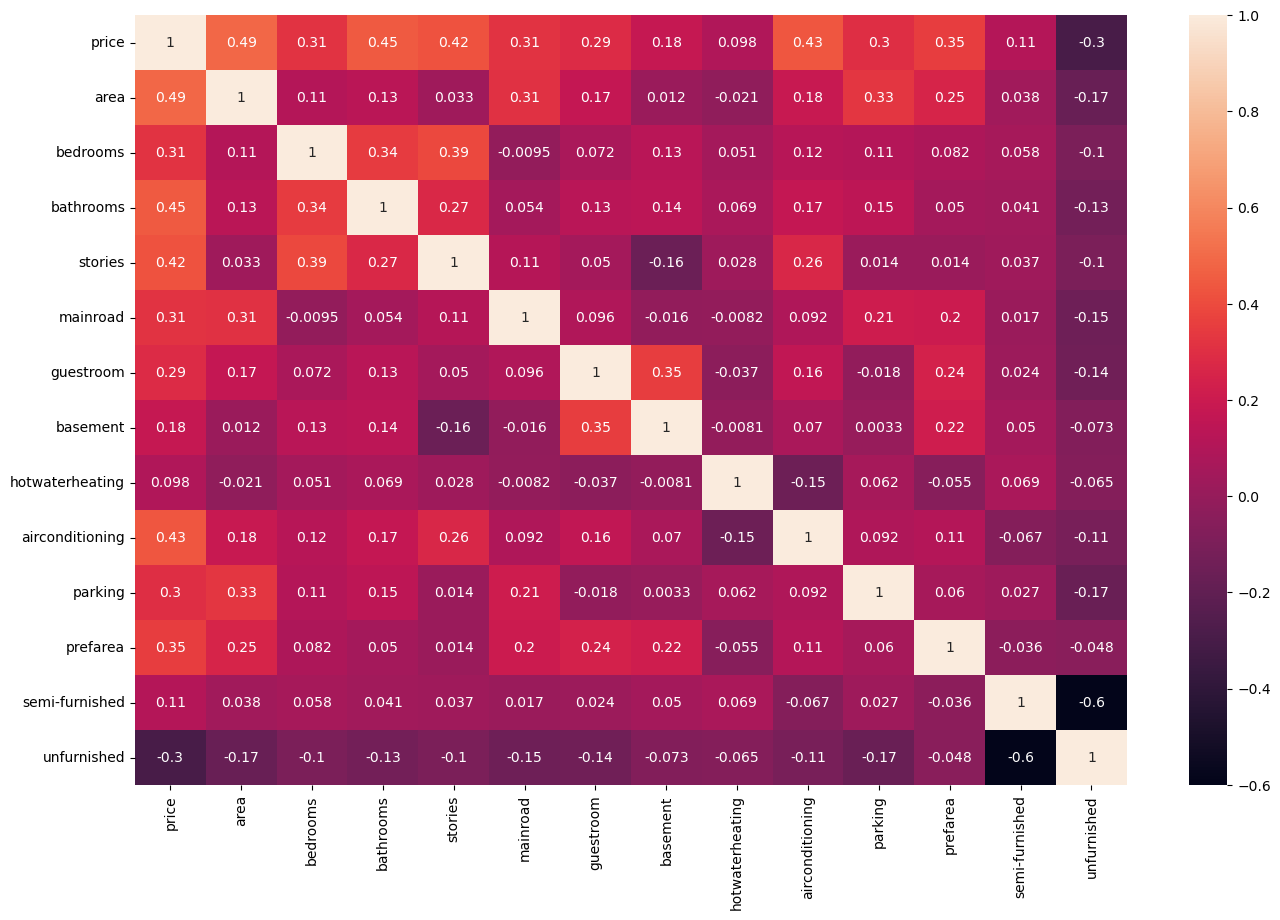

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16,10))
sns.heatmap(Housing_train.corr(), annot = True)
plt.show()

In [48]:
# Dividing into X and Y sets for the model building
# Here, I will extract 'price' from the Y train because I want to use the remaining df as the feature set. 

In [49]:
y_train = Housing_train.pop('price')
x_train = Housing_train

# Model Building 

In [50]:
# Now, we will be using the Linear Regression function from Scikit Learn for its compatibility with RFE(which is
# a utility from sklearn)

In [51]:
# RFE 
# Recursive Feature Elimination

# Recursive Feature Elimination (RFE) is a feature selection method that recursively removes the least
# important features and builds a model on those features that remain. It uses a model (often a linear model) to
# rank the features and eliminate the least significant ones iteratively until the desired number of features is reached.

In [52]:
#  Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [53]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

# Define the estimator
lm = LinearRegression() # or your chosen estimator 

# Initialize the RFE instance with the estimator and the number of features to select 
rfe = RFE(estimator = lm, n_features_to_select = 6 )

# Fit the RFE instance on the training data

rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [55]:
list(zip(x_train.columns,rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 2),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [56]:
col = x_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [57]:
x_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [59]:
# creating x_train df with RFE selected variables
x_train_rfe= x_train[col]

In [60]:
# adding a constant variable/ intercept

In [61]:
import statsmodels.api as sm 
x_train_rfe = sm.add_constant(x_train_rfe)

In [62]:
lm= sm.OLS(y_train,x_train_rfe).fit()  
# Running the linear model

In [63]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     90.72
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           3.19e-69
Time:                        21:17:57   Log-Likelihood:                 218.90
No. Observations:                 371   AIC:                            -423.8
Df Residuals:                     364   BIC:                            -396.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1123      0.015     

In [64]:
# calculate the VIFs for the model

In [65]:
# VIF ≥ 5: High correlation, indicating potential multicollinearity problems. Some sources use a threshold of 10 instead of 5.
# VIF = 1: No correlation between the predictor and other variables (no multicollinearity).
# 1 < VIF < 5: Moderate correlation, usually acceptable.


In [67]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [68]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.72
5,airconditioning,1.16
3,stories,1.15
1,area,1.11
2,bathrooms,1.11
6,prefarea,1.07
4,hotwaterheating,1.04


# Residual Analysis of the train data

In [69]:
y_train_price = lm.predict(x_train_rfe)

In [70]:
res = (y_train_price - y_train)

In [71]:
res

48    -0.374845
465    0.014902
144   -0.119188
395    0.013433
254    0.026232
         ...   
295   -0.128517
68    -0.310752
365   -0.014170
94    -0.019893
535    0.127354
Length: 371, dtype: float64

In [72]:
# Importing required libraries for plots

In [73]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [74]:
# Plot the histogram of the error terms

Text(0.5, 0, 'Errors')

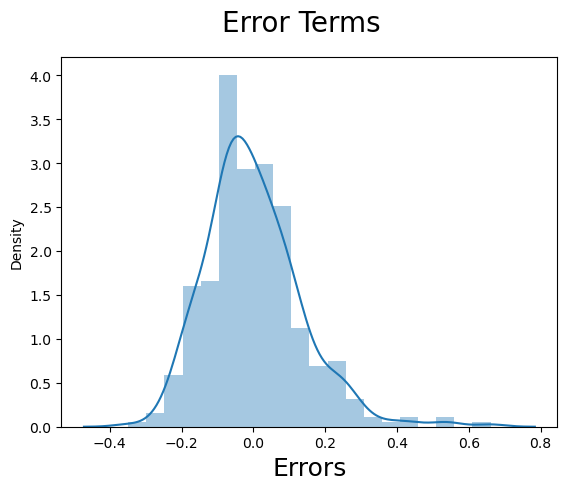

In [76]:
fig = plt.figure()
sns.distplot((y_train-y_train_price),bins =20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors',fontsize =18)

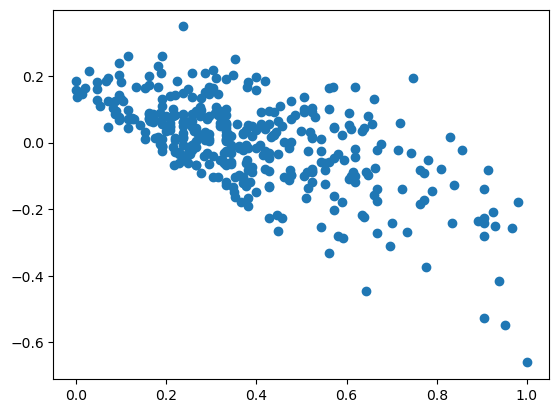

In [77]:
plt.scatter(y_train, res)
plt.show()

In [78]:
# There might be some relation in the error terms

# Model Evaluation

In [80]:
num_vars = ['area','stories','bathrooms','airconditioning','prefarea','parking','price']

In [82]:
Housing_test[num_vars]= scaler.fit_transform(Housing_test[num_vars])

In [83]:
Housing_test[num_vars]

,area,stories,bathrooms,airconditioning,prefarea,parking,price
406,0.299556,0.000000,0.0,0.0,1.0,0.333333,0.233333
489,0.120000,0.333333,0.0,0.0,0.0,0.333333,0.147619
436,0.017333,0.333333,0.0,0.0,1.0,0.000000,0.209524
325,0.134222,0.333333,0.0,1.0,0.0,0.000000,0.307143
317,0.270400,0.333333,0.5,0.0,0.0,0.666667,0.314286
...,...,...,...,...,...,...,...
172,0.573333,0.333333,0.0,1.0,1.0,0.666667,0.476190
210,0.239644,0.333333,0.0,0.0,0.0,0.666667,0.428571
169,0.408000,0.333333,0.5,1.0,0.0,0.000000,0.476190
544,0.168889,0.333333,0.0,0.0,0.0,0.000000,0.000000


In [85]:
y_test = Housing_test.pop('price')
x_test = Housing_test

In [86]:
# Adding constant variable to test df
x_test = sm.add_constant(x_test)

In [87]:
# creating x_test_new df  by dropping variables from x_test..also, you want to make sure you are using the rfe you have used in 
# train data 

In [88]:
x_test_rfe= x_test[x_train_rfe.columns]

In [89]:
# plotting y_test and y_pred to understand the spread 

In [91]:
y_pred= lm.predict(x_test_rfe)
y_pred

406    0.384460
489    0.241416
436    0.307983
325    0.361478
317    0.442456
         ...   
172    0.704939
210    0.302565
169    0.625573
544    0.266403
111    0.652392
Length: 159, dtype: float64

Text(0, 0.5, 'y_pred')

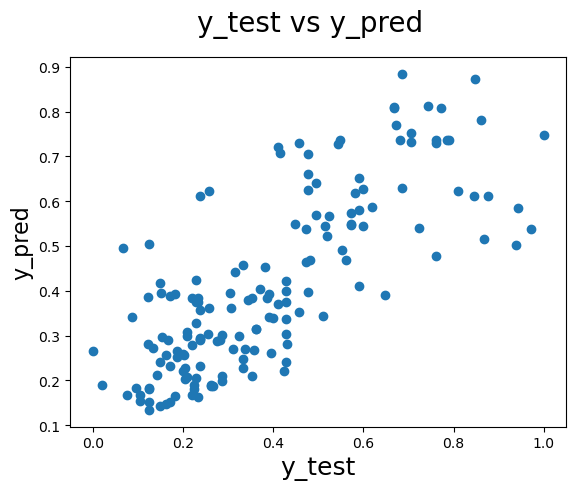

In [92]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test',fontsize = 18)
plt.ylabel('y_pred',fontsize =16)